In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
json_file = "final_dataset (1).json"
data = pd.read_json(json_file)
data.reset_index(drop = True, inplace = True)
csv_file = "New_final_dataset.csv"
data.to_csv(csv_file, index=False)

print("Conversion completed successfully!")

Conversion completed successfully!


In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
df = data.copy()

In [6]:
df.columns = df.columns.str.lower()


In [7]:
df.sample(3)

,url,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,gardenarea,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
14222,https://www.immoweb.be/en/classified/house/for...,3.00,3,2014.00,Belgium,Brugge,NaN,NON_FLOOD_ZONE,NaN,NaN,NaN,HYPER_EQUIPPED,354.00,Knokke,NaN,4.00,B,8300,3850000,10810278,West Flanders,Flanders,10.00,0.00,GOOD,villa,1988.00,NaN,1.00,1.00,1,residential_sale
95434,https://www.immoweb.be/en/classified/house/for...,1.00,3,NaN,Belgium,Leuven,NaN,None,NaN,NaN,NaN,None,170.00,Waasmont,NaN,4.00,None,3401,369000,11027154,Flemish Brabant,Flanders,NaN,0.00,None,house,984.00,NaN,NaN,2.00,1,residential_sale
50819,https://www.immoweb.be/en/classified/apartment...,1.00,2,1960.00,Belgium,Brussels,NaN,None,0.00,NaN,NaN,SEMI_EQUIPPED,68.00,ANDERLECHT,NaN,NaN,G,1070,190000,11436112,Brussels,Brussels,2.00,0.00,None,apartment,NaN,0.00,NaN,1.00,2,residential_sale


In [8]:
df.shape

(118714, 32)

# Duplicated Rows Check

In [9]:
df.duplicated().sum()

0

# NULL VALUES

In [10]:
df.isnull().sum()

url                       0
bathroomcount          9602
bedroomcount              0
constructionyear      49816
country                   0
district                  7
fireplace            114591
floodingzone          60372
furnished             88389
garden                96211
gardenarea            96211
kitchen               51580
livingarea            14175
locality                  2
monthlycharges       105064
numberoffacades       41772
peb                   33640
postalcode                0
price                     0
propertyid                0
province                  7
region                    7
roomcount             85798
showercount           61587
stateofbuilding       37092
subtypeofproperty         0
surfaceofplot         60477
swimmingpool          78356
terrace               50370
toiletcount           22273
typeofproperty            0
typeofsale                0
dtype: int64

In [11]:
df.isnull().mean() * 100

url                  0.00
bathroomcount        8.09
bedroomcount         0.00
constructionyear    41.96
country              0.00
district             0.01
fireplace           96.53
floodingzone        50.85
furnished           74.46
garden              81.04
gardenarea          81.04
kitchen             43.45
livingarea          11.94
locality             0.00
monthlycharges      88.50
numberoffacades     35.19
peb                 28.34
postalcode           0.00
price                0.00
propertyid           0.00
province             0.01
region               0.01
roomcount           72.27
showercount         51.88
stateofbuilding     31.24
subtypeofproperty    0.00
surfaceofplot       50.94
swimmingpool        66.00
terrace             42.43
toiletcount         18.76
typeofproperty       0.00
typeofsale           0.00
dtype: float64

In [12]:
df.isnull().sum() * 100 / df.shape[0] 

url                  0.00
bathroomcount        8.09
bedroomcount         0.00
constructionyear    41.96
country              0.00
district             0.01
fireplace           96.53
floodingzone        50.85
furnished           74.46
garden              81.04
gardenarea          81.04
kitchen             43.45
livingarea          11.94
locality             0.00
monthlycharges      88.50
numberoffacades     35.19
peb                 28.34
postalcode           0.00
price                0.00
propertyid           0.00
province             0.01
region               0.01
roomcount           72.27
showercount         51.88
stateofbuilding     31.24
subtypeofproperty    0.00
surfaceofplot       50.94
swimmingpool        66.00
terrace             42.43
toiletcount         18.76
typeofproperty       0.00
typeofsale           0.00
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118714 entries, 0 to 118713
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   url                118714 non-null  object 
 1   bathroomcount      109112 non-null  float64
 2   bedroomcount       118714 non-null  int64  
 3   constructionyear   68898 non-null   float64
 4   country            118714 non-null  object 
 5   district           118707 non-null  object 
 6   fireplace          4123 non-null    float64
 7   floodingzone       58342 non-null   object 
 8   furnished          30325 non-null   float64
 9   garden             22503 non-null   float64
 10  gardenarea         22503 non-null   float64
 11  kitchen            67134 non-null   object 
 12  livingarea         104539 non-null  float64
 13  locality           118712 non-null  object 
 14  monthlycharges     13650 non-null   float64
 15  numberoffacades    76942 non-null   float64
 16  pe

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcount,109112.00,1.23,1.09,0.00,1.00,1.00,1.00,145.00
bedroomcount,118714.00,2.71,1.86,0.00,2.00,3.00,3.00,200.00
constructionyear,68898.00,1987.35,47.31,1753.00,1964.00,2000.00,2023.00,8071.00
fireplace,4123.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
furnished,30325.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
garden,22503.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
gardenarea,22503.00,45099.60,6666220.45,1.00,48.00,140.00,450.00,999999999.00
livingarea,104539.00,167.40,1814.59,9.00,90.00,124.00,182.00,452230.00
monthlycharges,13650.00,84.24,179.61,0.00,0.00,30.00,120.00,5250.00
numberoffacades,76942.00,2.79,0.87,1.00,2.00,3.00,4.00,24.00


In [15]:
df.describe(include = 'O').T

,count,unique,top,freq
url,118714,118714,https://www.immoweb.be/en/classified/apartment...,1
country,118714,1,Belgium,118714
district,118707,43,Brussels,14098
floodingzone,58342,9,NON_FLOOD_ZONE,55998
kitchen,67134,8,INSTALLED,32623
locality,118712,5738,Antwerpen,2396
peb,85074,18,B,18134
province,118707,11,West Flanders,20904
region,118707,3,Flanders,69669
stateofbuilding,81622,6,GOOD,43442


## Numerical and Categorical Variables

In [16]:
category_var = df.select_dtypes(include = 'object')
num_var = df.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  12
Number of numerical features are:  20


# Url

In [17]:
df.url.isna().sum()

0

# BathroomCount         

In [18]:
df.bathroomcount.isna().sum()

9602

In [19]:
mean_value = round(df.bathroomcount.mean())

mean_value

1

In [20]:
df['bathroomcount'].fillna(mean_value, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\800088645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathroomcount'].fillna(mean_value, inplace = True)


In [21]:
df['bathroomcount']= df['bathroomcount'].astype(int)

In [22]:
df.bathroomcount.isna().sum()

0

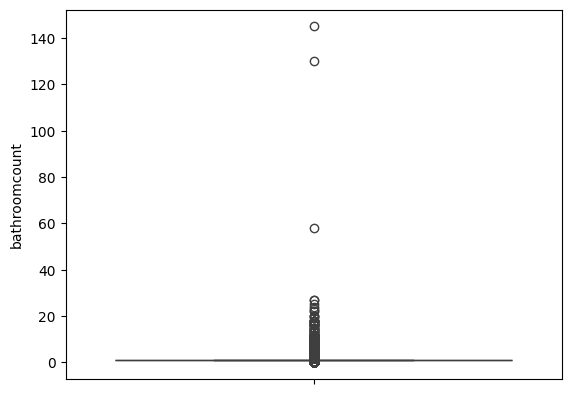

In [23]:

sns.boxplot(df.bathroomcount)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

# BedroomCount

In [24]:
df.bedroomcount.isna().sum()

0

In [25]:
df.bedroomcount.value_counts(normalize=True, dropna=False)

bedroomcount
2     0.32
3     0.32
1     0.12
4     0.12
5     0.04
0     0.03
6     0.02
7     0.01
8     0.00
9     0.00
10    0.00
12    0.00
11    0.00
14    0.00
13    0.00
15    0.00
16    0.00
20    0.00
18    0.00
17    0.00
30    0.00
25    0.00
24    0.00
22    0.00
26    0.00
19    0.00
35    0.00
27    0.00
39    0.00
34    0.00
21    0.00
200   0.00
29    0.00
48    0.00
23    0.00
33    0.00
88    0.00
37    0.00
60    0.00
31    0.00
28    0.00
63    0.00
100   0.00
47    0.00
36    0.00
70    0.00
45    0.00
44    0.00
32    0.00
41    0.00
Name: proportion, dtype: float64

(118714, 32)

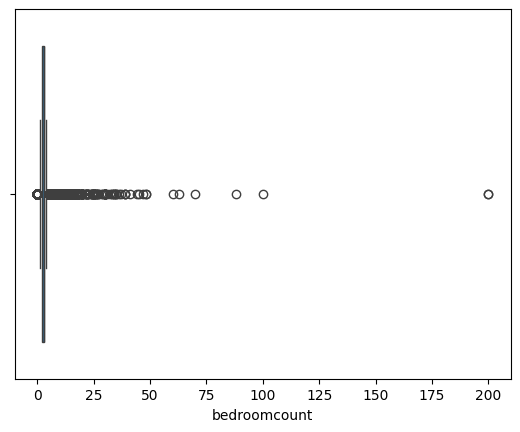

In [26]:
display(df.shape)
sns.boxplot(x=df['bedroomcount']);

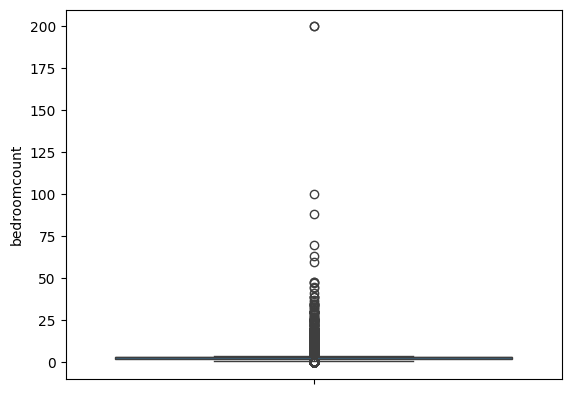

In [27]:

sns.boxplot(df.bedroomcount)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

# ConstructionYear

In [28]:
display(df.constructionyear.isnull().sum())

49816

In [29]:
df.constructionyear.value_counts(dropna = False)

constructionyear
NaN        49816
2024.00    10197
2023.00     7682
2022.00     2629
2025.00     1671
1930.00     1594
2021.00     1436
1970.00     1106
1960.00      944
2020.00      838
1950.00      817
1965.00      788
1900.00      762
1918.00      731
1968.00      727
2019.00      702
1976.00      675
1975.00      666
1850.00      651
2017.00      643
1966.00      637
2018.00      635
1967.00      623
1974.00      609
1977.00      599
1980.00      579
1969.00      576
1978.00      573
2015.00      560
1990.00      551
1964.00      548
2016.00      545
2026.00      542
1971.00      532
2010.00      530
1963.00      524
1958.00      517
1972.00      513
1962.00      512
1973.00      511
2014.00      503
2008.00      500
2005.00      496
2009.00      483
2012.00      482
2007.00      481
1979.00      474
1995.00      462
1899.00      459
2004.00      453
1961.00      447
1959.00      441
2006.00      439
2001.00      436
1993.00      433
1992.00      430
1994.00      405
2013.00      4

In [30]:

columns_for_imputation = [ 'bedroomcount', 'bathroomcount', 'constructionyear', 'price']
knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df[columns_for_imputation]), columns = columns_for_imputation)

df['constructionyear'] = df_imputed['constructionyear'].values

df_imputed.head()

,bedroomcount,bathroomcount,constructionyear,price
0,1.00,1.00,1969.00,99000.00
1,13.00,6.00,1920.00,765000.00
2,4.00,2.00,2008.00,399000.00
3,4.00,1.00,1955.60,230000.00
4,2.00,0.00,1972.00,198000.00


In [31]:
df.constructionyear.value_counts(dropna = False)

constructionyear
2024.00    10869
2023.00     8333
2022.00     2787
2025.00     1685
1930.00     1619
2021.00     1526
1970.00     1258
1960.00      992
2020.00      879
2023.40      863
1968.00      852
2023.60      851
1950.00      848
1965.00      833
1967.00      803
1977.00      796
1900.00      764
2007.00      762
1976.00      756
1918.00      752
1975.00      749
2010.00      742
2019.00      733
1964.00      727
1971.00      724
2023.20      723
2023.80      719
2017.00      700
2018.00      693
1990.00      691
1966.00      682
1980.00      669
1850.00      653
2015.00      649
1974.00      646
2011.00      635
1958.00      633
1969.00      625
1978.00      620
1962.00      618
1979.00      614
2003.00      602
2016.00      591
2009.00      591
1963.00      577
2012.00      576
1973.00      574
1972.00      570
2004.00      565
1961.00      563
2001.00      555
2005.00      547
1994.00      547
2014.00      546
2008.00      544
1991.00      544
2026.00      542
1992.00      5

In [32]:
df.constructionyear.describe()

count   118714.00
mean      1986.67
std         41.96
min       1753.00
25%       1964.20
50%       1994.00
75%       2021.00
max       8071.00
Name: constructionyear, dtype: float64

(118714, 32)

(117109, 32)

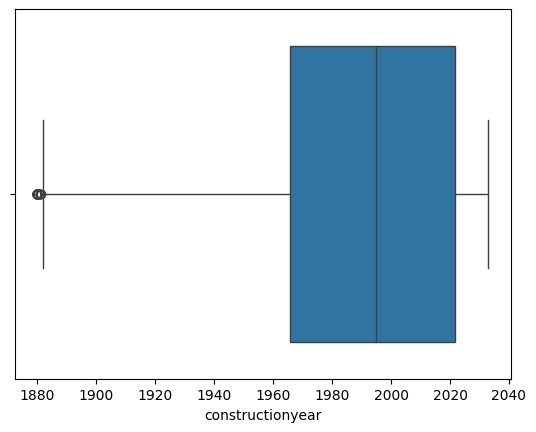

In [33]:
display(df.shape)
q1 = df.constructionyear.quantile(0.25)
q3 = df.constructionyear.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df.constructionyear > lower_bound) & (df.constructionyear < upper_bound)]
display(df.shape)
sns.boxplot(x=df['constructionyear']);
# print(lower_bound, upper_bound)

In [34]:
df.constructionyear = df.constructionyear.astype(int)
df.constructionyear.value_counts(dropna = False)


constructionyear
2023    11489
2024    11355
2022     4073
2021     1979
1930     1750
2025     1698
1970     1506
1960     1505
1967     1286
2010     1279
2001     1256
1986     1248
1968     1244
1977     1240
2012     1203
1976     1201
2009     1190
2007     1173
2011     1151
2020     1140
1992     1126
1995     1125
1965     1119
1971     1101
2008     1099
1990     1094
2018     1073
2003     1068
1994     1065
2013     1062
1950     1061
2015     1049
2000     1040
1991     1036
2005     1034
1972     1024
2006     1018
1978     1016
2017     1009
1999     1007
2019     1004
1975      997
1988      993
1973      984
1980      977
1997      967
2016      965
1966      949
1969      938
1961      936
1996      929
2004      918
1987      913
1974      911
1993      904
2014      902
2002      902
1964      901
1962      882
1979      865
1989      864
1958      858
1982      858
1981      810
1918      807
1998      796
1983      789
1900      775
1963      771
1984      707
195

# Country               

In [35]:
df.country.isnull().sum()

0

In [36]:
df.country.value_counts(normalize=True, dropna=False)   

country
Belgium   1.00
Name: proportion, dtype: float64

# District              

In [37]:
df.district.isnull().sum()

7

In [38]:
df[df.district.isnull()]

,url,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,gardenarea,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
59588,https://www.immoweb.be/en/classified/apartment...,1,3,1970,Belgium,None,NaN,NON_FLOOD_ZONE,0.00,NaN,NaN,None,250.00,Rombach,NaN,4.00,None,8814,695000,11426204,None,None,NaN,NaN,None,apartment,NaN,0.00,NaN,NaN,2,residential_sale
61035,https://www.immoweb.be/en/classified/apartment...,1,1,1977,Belgium,None,NaN,None,NaN,NaN,NaN,None,49.00,None,NaN,NaN,None,8548,219000,11368112,None,None,NaN,NaN,None,flat_studio,NaN,NaN,1.00,NaN,2,residential_sale
61042,https://www.immoweb.be/en/classified/apartment...,1,1,2023,Belgium,None,NaN,None,NaN,NaN,NaN,None,49.00,None,NaN,NaN,None,8545,216500,11368105,None,None,NaN,NaN,None,flat_studio,NaN,NaN,1.00,NaN,2,residential_sale
81496,https://www.immoweb.be/en/classified/apartment...,1,1,1991,Belgium,None,NaN,None,NaN,NaN,NaN,None,52.00,Gent,25.00,NaN,B,0,750,11297796,None,None,4.00,0.00,GOOD,apartment,NaN,NaN,NaN,1.00,2,residential_monthly_rent
84229,https://www.immoweb.be/en/classified/apartment...,2,3,2020,Belgium,None,1.00,NON_FLOOD_ZONE,NaN,NaN,NaN,None,214.00,Cadzand,NaN,3.00,A++,4506,4950000,11204872,None,None,1.00,0.00,AS_NEW,apartment,NaN,1.00,1.00,0.00,2,residential_sale
89496,https://www.immoweb.be/en/classified/apartment...,2,2,2020,Belgium,None,1.00,NON_FLOOD_ZONE,NaN,NaN,NaN,None,204.00,Cadzand,NaN,2.00,A++,4506,3950000,11182982,None,None,3.00,1.00,AS_NEW,apartment,NaN,1.00,1.00,3.00,2,residential_sale
89783,https://www.immoweb.be/en/classified/apartment...,2,3,2020,Belgium,None,1.00,NON_FLOOD_ZONE,NaN,NaN,NaN,None,214.00,Cadzand,NaN,3.00,A++,4506,4950000,11180310,None,None,4.00,0.00,GOOD,apartment,NaN,1.00,1.00,0.00,2,residential_sale


In [39]:
df['district'] = df.apply(lambda x: "Knokke-Heist" if x.locality == 'Cadzand' else x['district'], axis = 1)

df['district'] = df.apply(lambda x: "Gent" if x.locality == 'Gent' else x['district'], axis = 1)

df['district'] = df.apply(lambda x: "Marche-en-Famenne" if x.locality == 'Rombach' else x['district'], axis = 1)

df['district'] = df.apply(lambda x: "Gent" if x.district == None else x['district'], axis = 1)


In [40]:
df.district.isnull().sum()

0

# Fireplace            

In [41]:
df.fireplace.isnull().sum()

113137

In [42]:
df.fireplace.value_counts(dropna=False)

fireplace
NaN     113137
1.00      3972
Name: count, dtype: int64

In [43]:
df.fireplace.fillna(0 , inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\1486195836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.fireplace.fillna(0 , inplace = True)


In [44]:
df.fireplace = df.fireplace.astype(int)
display(df.fireplace.value_counts( dropna=False))


fireplace
0    113137
1      3972
Name: count, dtype: int64

# FloodingZone         

In [45]:
df.floodingzone.isnull().sum() / df.shape[0]

0.5102169773458914

In [46]:
df.groupby('district')['floodingzone'].value_counts(ascending = False, dropna=False)

district           floodingzone                                   
Aalst              NON_FLOOD_ZONE                                     1731
                   NaN                                                1667
                   POSSIBLE_FLOOD_ZONE                                  68
                   RECOGNIZED_FLOOD_ZONE                                17
Antwerp            NON_FLOOD_ZONE                                     6210
                   NaN                                                3683
                   POSSIBLE_FLOOD_ZONE                                 168
                   RECOGNIZED_FLOOD_ZONE                                88
                   POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE                  11
                   RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE                10
                   CIRCUMSCRIBED_WATERSIDE_ZONE                          4
                   CIRCUMSCRIBED_FLOOD_ZONE                              3
                   POSSIBLE_N_CIR

In [47]:
df.floodingzone.fillna('NON_FLOOD_ZONE', inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\935411990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.floodingzone.fillna('NON_FLOOD_ZONE', inplace = True)


In [48]:
df.floodingzone.value_counts(dropna=False)

floodingzone
NON_FLOOD_ZONE                                     114820
POSSIBLE_FLOOD_ZONE                                  1486
RECOGNIZED_FLOOD_ZONE                                 629
CIRCUMSCRIBED_WATERSIDE_ZONE                           58
POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE                    47
CIRCUMSCRIBED_FLOOD_ZONE                               34
RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE                  21
POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE                 9
RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE         5
Name: count, dtype: int64

# Furnished

In [49]:
df.furnished.isnull().sum()

87403

In [50]:
df.furnished.fillna(0, inplace = True)


C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\727708344.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.furnished.fillna(0, inplace = True)


In [51]:
df.furnished = df.furnished.astype(int)

In [52]:
display(df.furnished.value_counts(dropna=False))


furnished
0    115031
1      2078
Name: count, dtype: int64

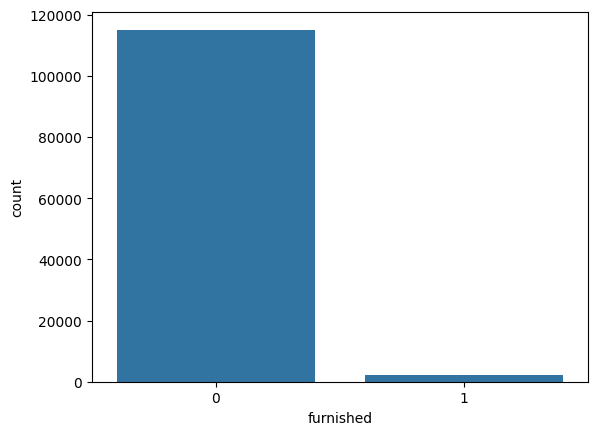

In [53]:
sns.countplot(data = df, x = 'furnished');

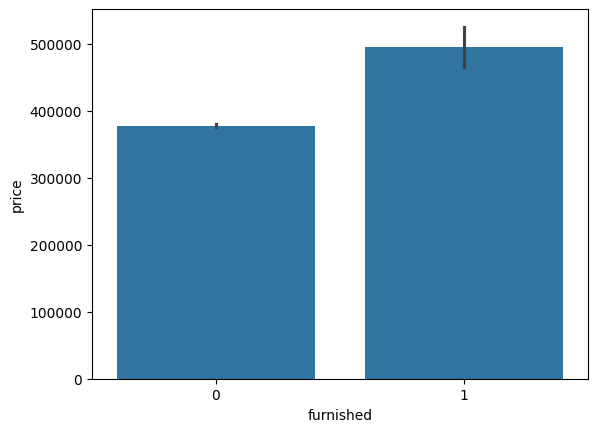

In [54]:
sns.barplot(data = df, x = 'furnished', y = 'price');

#  Garden

In [55]:
df.garden.value_counts(normalize= True, dropna = False)

garden
NaN    0.81
1.00   0.19
Name: proportion, dtype: float64

In [56]:
df['garden'].fillna(0, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\3323151509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['garden'].fillna(0, inplace = True)


In [57]:
df.garden = df.garden.astype(int)

In [58]:
df.garden.dtype

dtype('int32')

In [59]:
df.garden.value_counts(normalize= True, dropna = False)

garden
0   0.81
1   0.19
Name: proportion, dtype: float64

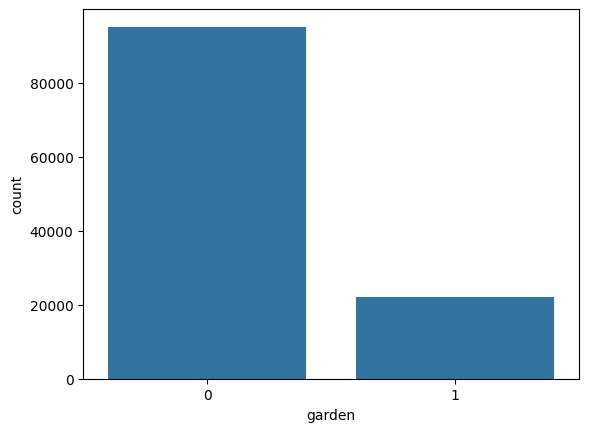

In [60]:
sns.countplot(data = df, x = 'garden');

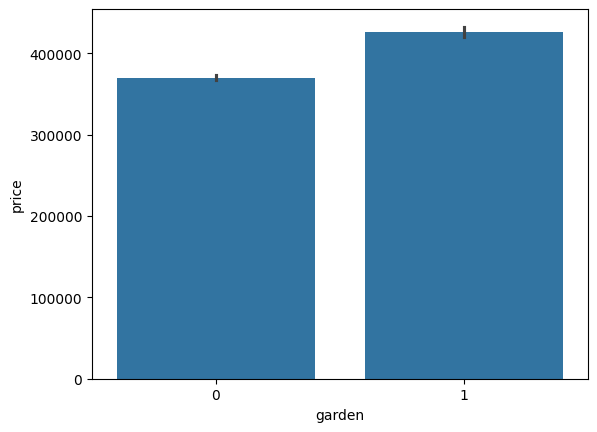

In [61]:
sns.barplot(data = df, x = 'garden', y = 'price');

# GardenArea

In [62]:
df.gardenarea.isna().sum() / df.shape[0]

0.8118931935205663

### *There is more than 80% missing values in the GardenArea column. So, it is better to drop this column.*

In [63]:
df.drop('gardenarea', axis = 1, inplace = True)

# Kitchen

In [64]:
df.kitchen.value_counts(normalize= True, dropna = False)

kitchen
None                 0.44
INSTALLED            0.27
HYPER_EQUIPPED       0.17
SEMI_EQUIPPED        0.06
NOT_INSTALLED        0.03
USA_HYPER_EQUIPPED   0.01
USA_INSTALLED        0.01
USA_SEMI_EQUIPPED    0.00
USA_UNINSTALLED      0.00
Name: proportion, dtype: float64

In [65]:
kitchen_mode = df.kitchen.mode()

kitchen_mode

0    INSTALLED
Name: kitchen, dtype: object

In [66]:
df.kitchen.fillna(kitchen_mode[0] , inplace = True)


C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\3675002946.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.kitchen.fillna(kitchen_mode[0] , inplace = True)


In [67]:
df.kitchen.value_counts(normalize= True, dropna = False)


kitchen
INSTALLED            0.71
HYPER_EQUIPPED       0.17
SEMI_EQUIPPED        0.06
NOT_INSTALLED        0.03
USA_HYPER_EQUIPPED   0.01
USA_INSTALLED        0.01
USA_SEMI_EQUIPPED    0.00
USA_UNINSTALLED      0.00
Name: proportion, dtype: float64

# LivingArea

In [68]:
df.livingarea.value_counts( dropna = False)

livingarea
NaN          14066
90.00         1838
100.00        1811
85.00         1468
110.00        1408
80.00         1361
150.00        1350
120.00        1349
95.00         1285
140.00        1248
130.00        1110
75.00         1061
70.00         1052
160.00        1035
200.00        1013
105.00         995
180.00         963
92.00          916
91.00          876
125.00         838
89.00          831
96.00          826
93.00          819
65.00          814
97.00          814
88.00          806
60.00          790
170.00         787
115.00         773
94.00          765
86.00          753
87.00          750
98.00          744
82.00          743
99.00          721
83.00          720
102.00         713
84.00          708
104.00         683
106.00         668
135.00         649
103.00         649
145.00         648
165.00         620
112.00         615
76.00          609
190.00         602
101.00         597
108.00         588
175.00         581
78.00          569
107.00         568
2

In [69]:
columns_for_imputation = ['livingarea', 'bedroomcount', 'bathroomcount', 'constructionyear', 'price']
df[columns_for_imputation].isna().sum()


livingarea          14066
bedroomcount            0
bathroomcount           0
constructionyear        0
price                   0
dtype: int64

In [70]:

columns_for_imputation = ['livingarea', 'bedroomcount', 'bathroomcount', 'constructionyear', 'price']
knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df[columns_for_imputation]), columns = columns_for_imputation)

df['livingarea'] = df_imputed['livingarea'].values

df_imputed.head()




,livingarea,bedroomcount,bathroomcount,constructionyear,price
0,29.00,1.00,1.00,1969.00,99000.00
1,391.00,13.00,6.00,1920.00,765000.00
2,111.00,4.00,2.00,2008.00,399000.00
3,165.00,4.00,1.00,1955.00,230000.00
4,92.00,2.00,0.00,1972.00,198000.00


In [71]:
df.livingarea.isna().sum()

0

# Locality

In [72]:
df.locality.isna().sum()

2

In [73]:
df[df.locality.isna()]

,url,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
61035,https://www.immoweb.be/en/classified/apartment...,1,1,1977,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,INSTALLED,49.00,None,NaN,NaN,None,8548,219000,11368112,None,None,NaN,NaN,None,flat_studio,NaN,NaN,1.00,NaN,2,residential_sale
61042,https://www.immoweb.be/en/classified/apartment...,1,1,2023,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,INSTALLED,49.00,None,NaN,NaN,None,8545,216500,11368105,None,None,NaN,NaN,None,flat_studio,NaN,NaN,1.00,NaN,2,residential_sale


In [74]:
df.district.isna().sum()

0

In [75]:
df['locality'] = df.apply(lambda x: x.district if x.locality == None else x['locality'], axis = 1)

In [76]:
df.locality.isna().sum()

0

# MonthlyCharges

In [77]:
df.monthlycharges.isna().sum() / df.shape[0]

0.8842275145377384

In [78]:
df.monthlycharges.value_counts( dropna = False)

monthlycharges
NaN        103551
0.00         6119
50.00         716
100.00        614
150.00        608
200.00        391
75.00         325
250.00        275
120.00        252
60.00         250
80.00         217
90.00         185
30.00         184
25.00         166
40.00         163
300.00        157
70.00         136
125.00        135
130.00        128
20.00         119
110.00        116
85.00         115
65.00         102
180.00        100
175.00         92
35.00          90
350.00         90
15.00          80
140.00         79
45.00          76
95.00          72
160.00         72
1.00           69
220.00         57
10.00          57
55.00          52
400.00         52
190.00         49
500.00         48
115.00         41
170.00         40
135.00         38
225.00         34
165.00         31
275.00         30
450.00         26
105.00         24
155.00         21
145.00         21
280.00         20
230.00         19
210.00         18
600.00         16
270.00         15
195.00       

In [79]:
df.monthlycharges.describe()

count   13558.00
mean       83.77
std       179.33
min         0.00
25%         0.00
50%        30.00
75%       115.00
max      5250.00
Name: monthlycharges, dtype: float64

In [80]:
df.monthlycharges.fillna(0, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\1059496907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.monthlycharges.fillna(0, inplace = True)


In [81]:
df.monhtlycharges = df.monthlycharges.astype(int)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\461387135.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.monhtlycharges = df.monthlycharges.astype(int)


In [82]:
df.monhtlycharges.dtype

dtype('int32')

In [83]:
df.monthlycharges.value_counts()

monthlycharges
0.00       109670
50.00         716
100.00        614
150.00        608
200.00        391
75.00         325
250.00        275
120.00        252
60.00         250
80.00         217
90.00         185
30.00         184
25.00         166
40.00         163
300.00        157
70.00         136
125.00        135
130.00        128
20.00         119
110.00        116
85.00         115
65.00         102
180.00        100
175.00         92
35.00          90
350.00         90
15.00          80
140.00         79
45.00          76
160.00         72
95.00          72
1.00           69
220.00         57
10.00          57
400.00         52
55.00          52
190.00         49
500.00         48
115.00         41
170.00         40
135.00         38
225.00         34
165.00         31
275.00         30
450.00         26
105.00         24
145.00         21
155.00         21
280.00         20
230.00         19
210.00         18
600.00         16
270.00         15
195.00         15
240.00       

# NumberOfFacades

In [84]:
df.numberoffacades.isna().sum() / df.shape[0]


0.3548745186108668

In [85]:
df.numberoffacades.value_counts(normalize= True, dropna = False)

numberoffacades
NaN     0.35
2.00    0.30
4.00    0.17
3.00    0.16
1.00    0.01
6.00    0.00
5.00    0.00
8.00    0.00
7.00    0.00
10.00   0.00
12.00   0.00
15.00   0.00
13.00   0.00
24.00   0.00
19.00   0.00
Name: proportion, dtype: float64

In [86]:
columns_for_imputation = ['numberoffacades', 'livingarea', 'bedroomcount', 'bathroomcount', 'constructionyear', 'price']
knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df[columns_for_imputation]), columns = columns_for_imputation)

df['numberoffacades'] = df_imputed['numberoffacades'].values

df_imputed.head()

,numberoffacades,livingarea,bedroomcount,bathroomcount,constructionyear,price
0,2.80,29.00,1.00,1.00,1969.00,99000.00
1,3.00,391.00,13.00,6.00,1920.00,765000.00
2,2.00,111.00,4.00,2.00,2008.00,399000.00
3,2.00,165.00,4.00,1.00,1955.00,230000.00
4,2.40,92.00,2.00,0.00,1972.00,198000.00


In [87]:
df.numberoffacades = df.numberoffacades.astype(int)
df.numberoffacades.value_counts( dropna = False)

numberoffacades
2     61603
3     32738
4     21118
1      1571
6        26
5        25
8         8
7         7
10        6
12        3
15        1
13        1
24        1
19        1
Name: count, dtype: int64

# PEB

In [88]:
df.peb.isna().sum() / df.shape[0]

0.2862973810723343

In [89]:
df.peb.value_counts(normalize= True, dropna = False)

peb
None   0.29
B      0.15
A      0.13
C      0.12
D      0.10
F      0.08
E      0.06
G      0.04
A+     0.02
A++    0.01
B_A    0.00
A_A+   0.00
F_C    0.00
F_D    0.00
G_C    0.00
F_E    0.00
E_D    0.00
E_C    0.00
Name: proportion, dtype: float64

In [90]:
df.peb.fillna(df.peb.mode()[0], inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\1426290148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.peb.fillna(df.peb.mode()[0], inplace = True)


In [91]:
df.peb.value_counts(normalize= True, dropna = False)

peb
B      0.44
A      0.13
C      0.12
D      0.10
F      0.08
E      0.06
G      0.04
A+     0.02
A++    0.01
B_A    0.00
A_A+   0.00
F_C    0.00
F_D    0.00
G_C    0.00
F_E    0.00
E_D    0.00
E_C    0.00
Name: proportion, dtype: float64

# PostalCode

In [92]:
df.postalcode.isna().sum()

0

In [93]:
df.postalcode.value_counts(normalize= True, dropna = False)

postalcode
8300   0.02
8400   0.02
1000   0.02
4000   0.02
1180   0.01
1050   0.01
9000   0.01
2000   0.01
1070   0.01
8370   0.01
8670   0.01
1030   0.01
1200   0.01
8800   0.01
5000   0.01
3000   0.01
2300   0.01
2018   0.01
9300   0.01
7500   0.01
7000   0.01
4020   0.01
2100   0.01
8000   0.01
8620   0.01
9600   0.01
8430   0.01
2800   0.01
8500   0.01
1190   0.01
3500   0.01
7700   0.01
1080   0.01
1040   0.01
1150   0.01
8660   0.00
4100   0.00
9100   0.00
9200   0.00
5100   0.00
2930   0.00
9800   0.00
2500   0.00
9120   0.00
1020   0.00
9700   0.00
1420   0.00
1140   0.00
1060   0.00
2600   0.00
2060   0.00
1160   0.00
7100   0.00
6700   0.00
2440   0.00
9500   0.00
2610   0.00
3800   0.00
8790   0.00
8301   0.00
8420   0.00
8870   0.00
4800   0.00
1410   0.00
6000   0.00
2830   0.00
1090   0.00
1400   0.00
9940   0.00
1300   0.00
2400   0.00
8530   0.00
1500   0.00
9160   0.00
1800   0.00
8200   0.00
1082   0.00
5030   0.00
9400   0.00
2640   0.00
2170   0.00
1480   0.00
7090 

# PropertyId

In [94]:
df.propertyid.isna().sum()

0

In [95]:
df.propertyid.duplicated().sum()

0

In [96]:
df[df.duplicated(subset='propertyid', keep=False)]

,url,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale


# Province

In [97]:
df.province.isna().sum()

7

In [98]:
df.province.value_counts(normalize= True, dropna = False)

province
West Flanders     0.18
Antwerp           0.15
East Flanders     0.14
Brussels          0.12
Hainaut           0.10
Liège             0.09
Flemish Brabant   0.08
Namur             0.04
Limburg           0.04
Walloon Brabant   0.04
Luxembourg        0.03
None              0.00
Name: proportion, dtype: float64

In [99]:
df[df['province'].isnull()]

,url,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
59588,https://www.immoweb.be/en/classified/apartment...,1,3,1970,Belgium,Marche-en-Famenne,0,NON_FLOOD_ZONE,0,0,INSTALLED,250.00,Rombach,0.00,4,B,8814,695000,11426204,None,None,NaN,NaN,None,apartment,NaN,0.00,NaN,NaN,2,residential_sale
61035,https://www.immoweb.be/en/classified/apartment...,1,1,1977,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,INSTALLED,49.00,Gent,0.00,2,B,8548,219000,11368112,None,None,NaN,NaN,None,flat_studio,NaN,NaN,1.00,NaN,2,residential_sale
61042,https://www.immoweb.be/en/classified/apartment...,1,1,2023,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,INSTALLED,49.00,Gent,0.00,2,B,8545,216500,11368105,None,None,NaN,NaN,None,flat_studio,NaN,NaN,1.00,NaN,2,residential_sale
81496,https://www.immoweb.be/en/classified/apartment...,1,1,1991,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,INSTALLED,52.00,Gent,25.00,2,B,0,750,11297796,None,None,4.00,0.00,GOOD,apartment,NaN,NaN,NaN,1.00,2,residential_monthly_rent
84229,https://www.immoweb.be/en/classified/apartment...,2,3,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,INSTALLED,214.00,Cadzand,0.00,3,A++,4506,4950000,11204872,None,None,1.00,0.00,AS_NEW,apartment,NaN,1.00,1.00,0.00,2,residential_sale
89496,https://www.immoweb.be/en/classified/apartment...,2,2,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,INSTALLED,204.00,Cadzand,0.00,2,A++,4506,3950000,11182982,None,None,3.00,1.00,AS_NEW,apartment,NaN,1.00,1.00,3.00,2,residential_sale
89783,https://www.immoweb.be/en/classified/apartment...,2,3,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,INSTALLED,214.00,Cadzand,0.00,3,A++,4506,4950000,11180310,None,None,4.00,0.00,GOOD,apartment,NaN,1.00,1.00,0.00,2,residential_sale


In [100]:
df.province = df.apply(lambda x: 'West Flanders' if x.district == 'Gent' else x['province'], axis = 1)


df.drop(df[df['locality'] == 'Rombach'].index, inplace = True)

In [101]:
df.province.isna().sum()

3

In [102]:
df.province.value_counts(normalize= True, dropna = False)

province
West Flanders     0.23
Antwerp           0.15
Brussels          0.12
Hainaut           0.10
East Flanders     0.09
Liège             0.09
Flemish Brabant   0.08
Namur             0.04
Limburg           0.04
Walloon Brabant   0.04
Luxembourg        0.03
None              0.00
Name: proportion, dtype: float64

# Region

In [103]:
df.region.isna().sum()

6

In [104]:
df.region.value_counts(normalize= True, dropna = False)

region
Flanders   0.59
Wallonie   0.29
Brussels   0.12
None       0.00
Name: proportion, dtype: float64

In [105]:
df[df['region'].isnull()]

,url,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
61035,https://www.immoweb.be/en/classified/apartment...,1,1,1977,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,INSTALLED,49.00,Gent,0.00,2,B,8548,219000,11368112,West Flanders,None,NaN,NaN,None,flat_studio,NaN,NaN,1.00,NaN,2,residential_sale
61042,https://www.immoweb.be/en/classified/apartment...,1,1,2023,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,INSTALLED,49.00,Gent,0.00,2,B,8545,216500,11368105,West Flanders,None,NaN,NaN,None,flat_studio,NaN,NaN,1.00,NaN,2,residential_sale
81496,https://www.immoweb.be/en/classified/apartment...,1,1,1991,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,INSTALLED,52.00,Gent,25.00,2,B,0,750,11297796,West Flanders,None,4.00,0.00,GOOD,apartment,NaN,NaN,NaN,1.00,2,residential_monthly_rent
84229,https://www.immoweb.be/en/classified/apartment...,2,3,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,INSTALLED,214.00,Cadzand,0.00,3,A++,4506,4950000,11204872,None,None,1.00,0.00,AS_NEW,apartment,NaN,1.00,1.00,0.00,2,residential_sale
89496,https://www.immoweb.be/en/classified/apartment...,2,2,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,INSTALLED,204.00,Cadzand,0.00,2,A++,4506,3950000,11182982,None,None,3.00,1.00,AS_NEW,apartment,NaN,1.00,1.00,3.00,2,residential_sale
89783,https://www.immoweb.be/en/classified/apartment...,2,3,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,INSTALLED,214.00,Cadzand,0.00,3,A++,4506,4950000,11180310,None,None,4.00,0.00,GOOD,apartment,NaN,1.00,1.00,0.00,2,residential_sale


In [106]:
df.region = df.apply(lambda x: 'Flanders' if x.province == 'West Flanders' else x['region'], axis = 1)

In [107]:
df.region.value_counts(normalize= True, dropna = False)

region
Flanders   0.59
Wallonie   0.29
Brussels   0.12
None       0.00
Name: proportion, dtype: float64

# RoomCount

In [108]:
df.roomcount.isna().sum() / df.shape[0]

0.7220770570755201

In [109]:
# df['roomcount']=df.apply(lambda x: x.roomcount if pd.notnull(x['roomcount']) else (1.0 if x.price < 300000 else 3.0),axis=1)

In [110]:
columns_for_imputation = ['roomcount', 'numberoffacades', 'livingarea', 'bedroomcount', 'bathroomcount', 'constructionyear', 'price']
knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df[columns_for_imputation]), columns = columns_for_imputation)

df['roomcount'] = df_imputed['roomcount'].values

df['roomcount'].head()

0    1.00
1   31.00
2    3.00
3   10.20
4    1.00
Name: roomcount, dtype: float64

In [111]:
df.roomcount = df.roomcount.astype(int)
df.roomcount.value_counts(dropna = False)

roomcount
5     14095
4     13380
6     13319
7     11677
3     10666
1      9724
8      9507
9      7982
2      5855
10     5590
11     4174
12     2999
13     2097
14     2077
15     1345
16      796
17      510
18      354
19      254
20      194
21      131
22       95
23       63
24       45
25       30
26       25
28       20
29       20
27       17
30       16
36        7
32        6
31        5
35        5
33        5
38        3
40        3
34        3
44        2
43        2
37        2
53        2
39        1
41        1
45        1
48        1
60        1
68        1
Name: count, dtype: int64

# ShowerCount          

In [112]:
df.showercount.isna().sum() / df.shape[0]

0.5208183898623493

In [113]:
df.showercount.value_counts(normalize= True, dropna = False)

showercount
NaN       0.52
0.00      0.27
1.00      0.16
2.00      0.03
3.00      0.01
4.00      0.00
5.00      0.00
6.00      0.00
7.00      0.00
8.00      0.00
9.00      0.00
10.00     0.00
11.00     0.00
12.00     0.00
15.00     0.00
13.00     0.00
14.00     0.00
19.00     0.00
16.00     0.00
439.00    0.00
20.00     0.00
180.00    0.00
17.00     0.00
25.00     0.00
23.00     0.00
22.00     0.00
115.00    0.00
158.00    0.00
312.00    0.00
58.00     0.00
1120.00   0.00
50.00     0.00
490.00    0.00
Name: proportion, dtype: float64

In [114]:
df.showercount.fillna(1, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\3088969583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.showercount.fillna(1, inplace = True)


In [115]:
df.showercount = df.showercount.astype(int)
display(df.showercount.value_counts(normalize= True, dropna = False))

showercount
1      0.68
0      0.27
2      0.03
3      0.01
4      0.00
5      0.00
6      0.00
7      0.00
8      0.00
9      0.00
10     0.00
11     0.00
12     0.00
15     0.00
14     0.00
13     0.00
16     0.00
19     0.00
439    0.00
20     0.00
180    0.00
17     0.00
25     0.00
23     0.00
22     0.00
312    0.00
115    0.00
158    0.00
58     0.00
1120   0.00
50     0.00
490    0.00
Name: proportion, dtype: float64

# StateOfBuilding

In [116]:
df.stateofbuilding.isna().sum() / df.shape[0]

0.3145130990197083

In [117]:
df.stateofbuilding.value_counts(normalize= True, dropna= False)

stateofbuilding
GOOD             0.37
None             0.31
AS_NEW           0.16
TO_RENOVATE      0.06
TO_BE_DONE_UP    0.05
JUST_RENOVATED   0.05
TO_RESTORE       0.00
Name: proportion, dtype: float64

In [118]:
state_mapping = {
    'GOOD': 0,
    'None': 1,
    'AS_NEW': 2,
    'TO_RENOVATE': 3,
    'TO_BE_DONE_UP': 4,
    'JUST_RENOVATED': 5,
    'TO_RESTORE': 6
}

In [119]:
df['stateofbuilding'] = df['stateofbuilding'].map(state_mapping)
df.stateofbuilding.value_counts(dropna= False)

stateofbuilding
0.00    42954
NaN     36832
2.00    18753
3.00     7193
4.00     5564
5.00     5375
6.00      437
Name: count, dtype: int64

In [120]:
columns_for_imputation = ['stateofbuilding', 'numberoffacades', 'livingarea', 'bedroomcount', 'bathroomcount', 'constructionyear', 'price']
knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df[columns_for_imputation]), columns = columns_for_imputation)

df['stateofbuilding'] = df_imputed['stateofbuilding'].values

df['stateofbuilding'].head()

0   0.00
1   0.00
2   0.00
3   4.00
4   2.00
Name: stateofbuilding, dtype: float64

In [122]:
df.stateofbuilding = df.stateofbuilding.astype(int)
df.stateofbuilding.value_counts(normalize= True, dropna= False)

stateofbuilding
0   0.52
2   0.21
1   0.10
3   0.08
4   0.05
5   0.05
6   0.00
Name: proportion, dtype: float64

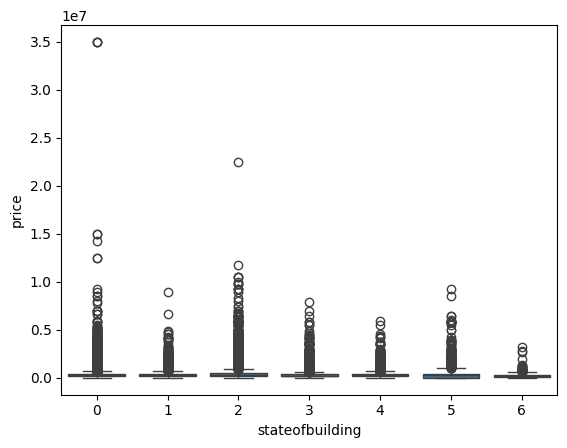

In [123]:
sns.boxplot(data = df, x = 'stateofbuilding', y = 'price');


# SubtypeOfProperty

In [124]:
df.subtypeofproperty.isna().sum()

0

In [125]:
df.subtypeofproperty.value_counts(normalize= True, dropna = False)

subtypeofproperty
apartment              0.40
house                  0.38
villa                  0.04
ground_floor           0.03
duplex                 0.02
flat_studio            0.02
apartment_block        0.02
penthouse              0.02
mixed_use_building     0.02
service_flat           0.01
kot                    0.01
mansion                0.01
town_house             0.01
bungalow               0.00
loft                   0.00
exceptional_property   0.00
country_cottage        0.00
farmhouse              0.00
triplex                0.00
chalet                 0.00
other_property         0.00
manor_house            0.00
castle                 0.00
pavilion               0.00
show_house             0.00
Name: proportion, dtype: float64

# SurfaceOfPlot

In [126]:
df.surfaceofplot.isna().sum() / df.shape[0]

0.514303036513304

In [127]:
columns_for_imputation = ['surfaceofplot', 'stateofbuilding', 'numberoffacades', 'livingarea', 'bedroomcount', 'bathroomcount', 'constructionyear', 'price']
knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df[columns_for_imputation]), columns = columns_for_imputation)

df['surfaceofplot'] = df_imputed['surfaceofplot'].values

df_imputed.head()

,surfaceofplot,stateofbuilding,numberoffacades,livingarea,bedroomcount,bathroomcount,constructionyear,price
0,364.60,0.00,2.00,29.00,1.00,1.00,1969.00,99000.00
1,130.00,0.00,3.00,391.00,13.00,6.00,1920.00,765000.00
2,0.00,0.00,2.00,111.00,4.00,2.00,2008.00,399000.00
3,170.00,4.00,2.00,165.00,4.00,1.00,1955.00,230000.00
4,902.40,2.00,2.00,92.00,2.00,0.00,1972.00,198000.00


In [130]:
df.surfaceofplot = df.surfaceofplot.astype(int)
df.surfaceofplot.value_counts(dropna = False)

surfaceofplot
0            8652
160           452
140           412
100           407
170           398
120           389
190           380
200           374
150           374
500           351
250           342
300           336
210           335
220           332
350           329
240           315
80            308
60            305
245           300
130           293
125           291
90            289
360           287
252           285
195           281
135           279
178           278
180           274
110           272
184           270
270           263
185           263
155           260
290           258
235           255
122           253
259           252
330           252
205           251
175           251
280           250
400           245
40            242
600           241
154           241
230           238
269           238
145           234
192           232
70            231
126           230
225           230
115           229
1000          229
212           

# SwimmingPool

In [131]:
df.swimmingpool.isna().sum() / df.shape[0]

0.6616541995423029

In [132]:
df.swimmingpool.value_counts(normalize= True, dropna= False)

swimmingpool
NaN    0.66
0.00   0.32
1.00   0.02
Name: proportion, dtype: float64

In [133]:
df['swimmingpool'] = df.apply(lambda x: 1.0 if any(i in x.values for i in ['villa', 'exceptional_property', 'mansion', 'penthouse']) else x['swimmingpool'], axis = 1)

In [135]:
df.swimmingpool.value_counts(normalize= True, dropna= False)

swimmingpool
NaN    0.62
0.00   0.30
1.00   0.08
Name: proportion, dtype: float64

In [136]:
df.swimmingpool.fillna(0, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\2916916286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.swimmingpool.fillna(0, inplace = True)


In [138]:
df.swimmingpool = df.swimmingpool.astype(int)
df.swimmingpool.value_counts(dropna= False)

swimmingpool
0    107309
1      9799
Name: count, dtype: int64

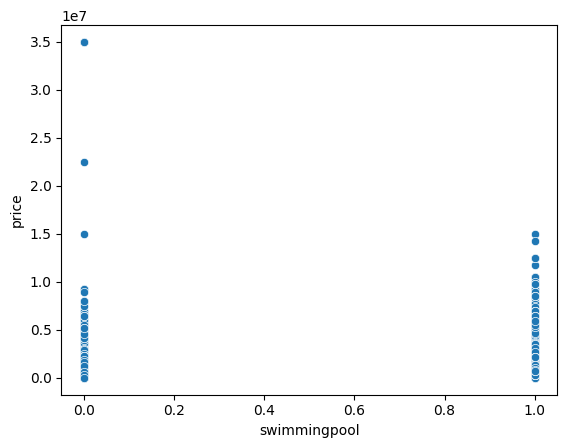

In [139]:
sns.scatterplot(data = df, x = 'swimmingpool', y = 'price');

In [140]:
df.swimmingpool.corr(df.price)

0.2687962407585386

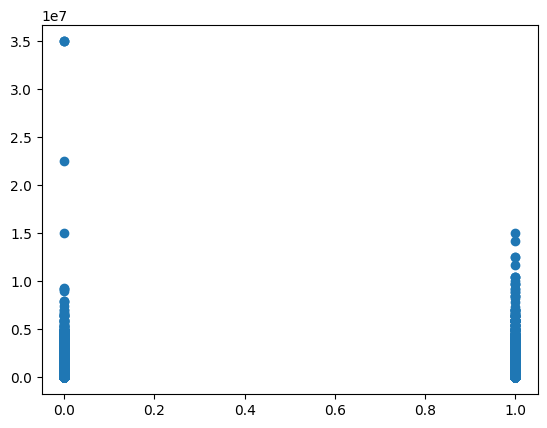

In [141]:
plt.scatter(df['swimmingpool'], df['price']);

# Terrace

In [142]:
df.terrace.isna().sum() / df.shape[0]

0.42352358506677595

In [143]:
df.terrace.value_counts(normalize= True, dropna = False) 

terrace
1.00   0.58
NaN    0.42
Name: proportion, dtype: float64

In [144]:
df.terrace.fillna(0, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\2406609116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.terrace.fillna(0, inplace = True)


In [145]:
df.terrace = df.terrace.astype(int)
df.terrace.value_counts( dropna = False) 

terrace
1    67510
0    49598
Name: count, dtype: int64

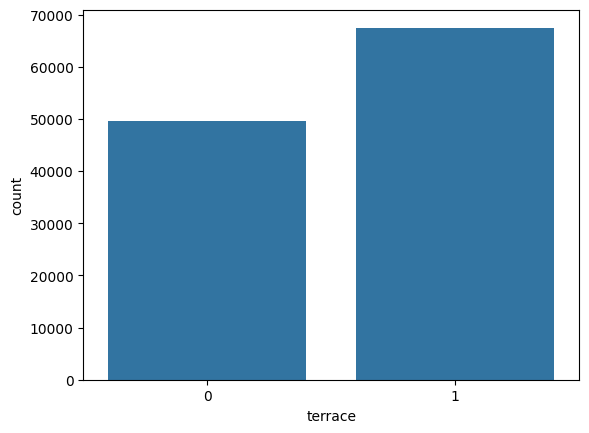

In [146]:
sns.countplot(data = df, x = 'terrace');

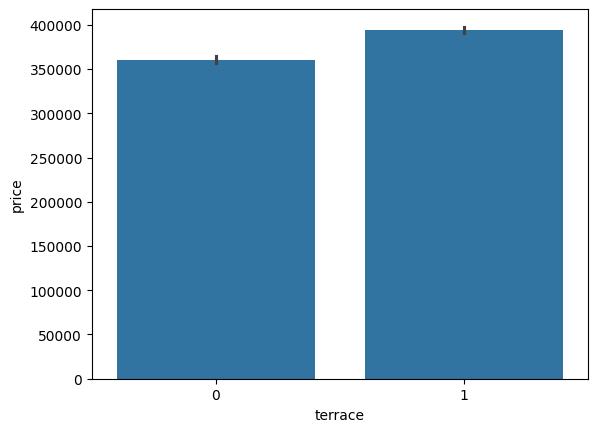

In [147]:
sns.barplot(data = df, x = 'terrace', y = 'price');

# ToiletCount

In [148]:
df.toiletcount.isna().sum()

22040

In [149]:
df.toiletcount.isna().sum() / df.shape[0] * 100

18.820234313625033

In [150]:
df.toiletcount.value_counts(normalize= True, dropna = False)

toiletcount
1.00         0.36
2.00         0.26
NaN          0.19
0.00         0.12
3.00         0.05
4.00         0.01
5.00         0.01
6.00         0.00
7.00         0.00
8.00         0.00
10.00        0.00
9.00         0.00
12.00        0.00
11.00        0.00
13.00        0.00
15.00        0.00
14.00        0.00
18.00        0.00
20.00        0.00
17.00        0.00
25.00        0.00
21.00        0.00
16.00        0.00
19.00        0.00
58.00        0.00
23.00        0.00
40.00        0.00
214.00       0.00
22.00        0.00
32.00        0.00
2147.00      0.00
27.00        0.00
3832365.00   0.00
Name: proportion, dtype: float64

In [151]:
df.toiletcount.fillna(df.toiletcount.mode()[0], inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_45832\1210924512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.toiletcount.fillna(df.toiletcount.mode()[0], inplace = True)


In [152]:
df.toiletcount.isna().sum()

0

In [153]:
df.toiletcount = df.toiletcount.astype(int)

In [154]:
df.toiletcount.value_counts(normalize= True, dropna = False)

toiletcount
1         0.55
2         0.26
0         0.12
3         0.05
4         0.01
5         0.01
6         0.00
7         0.00
8         0.00
10        0.00
9         0.00
12        0.00
11        0.00
13        0.00
15        0.00
14        0.00
18        0.00
20        0.00
17        0.00
21        0.00
25        0.00
16        0.00
32        0.00
40        0.00
22        0.00
214       0.00
2147      0.00
23        0.00
58        0.00
27        0.00
19        0.00
3832365   0.00
Name: proportion, dtype: float64

# TypeOfProperty

In [155]:
df.typeofproperty.isna().sum()

0

In [156]:
df.typeofproperty.value_counts(normalize= True, dropna = False)

typeofproperty
2   0.51
1   0.49
Name: proportion, dtype: float64

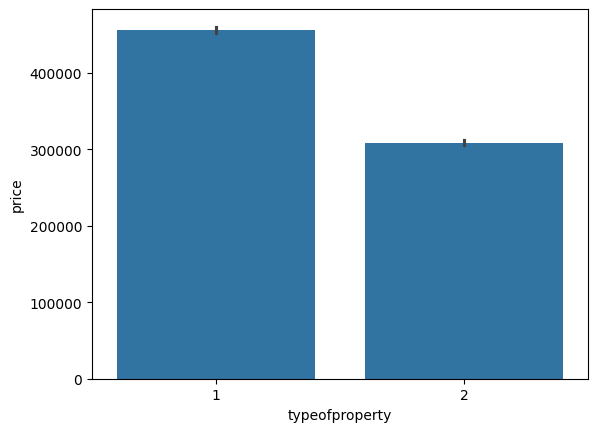

In [157]:
sns.barplot(data = df, x = 'typeofproperty', y = 'price');

# TypeOfSale

In [158]:
df.typeofsale.isna().sum()

0

In [159]:
df.typeofsale.value_counts(normalize= True, dropna = False)

typeofsale
residential_sale           0.88
residential_monthly_rent   0.11
annuity_monthly_amount     0.00
annuity_without_lump_sum   0.00
annuity_lump_sum           0.00
homes_to_build             0.00
Name: proportion, dtype: float64

In [160]:
missing_percentage = df.isnull().mean() * 100


In [161]:
missing_percentage[missing_percentage > 2]

Series([], dtype: float64)

# **INFO**

In [162]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 117108 entries, 0 to 118713
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   url                117108 non-null  object 
 1   bathroomcount      117108 non-null  int32  
 2   bedroomcount       117108 non-null  int64  
 3   constructionyear   117108 non-null  int32  
 4   country            117108 non-null  object 
 5   district           117108 non-null  object 
 6   fireplace          117108 non-null  int32  
 7   floodingzone       117108 non-null  object 
 8   furnished          117108 non-null  int32  
 9   garden             117108 non-null  int32  
 10  kitchen            117108 non-null  object 
 11  livingarea         117108 non-null  float64
 12  locality           117108 non-null  object 
 13  monthlycharges     117108 non-null  float64
 14  numberoffacades    117108 non-null  int32  
 15  peb                117108 non-null  object 
 16  postalc

In [163]:
df.isnull().sum()

url                  0
bathroomcount        0
bedroomcount         0
constructionyear     0
country              0
district             0
fireplace            0
floodingzone         0
furnished            0
garden               0
kitchen              0
livingarea           0
locality             0
monthlycharges       0
numberoffacades      0
peb                  0
postalcode           0
price                0
propertyid           0
province             3
region               3
roomcount            0
showercount          0
stateofbuilding      0
subtypeofproperty    0
surfaceofplot        0
swimmingpool         0
terrace              0
toiletcount          0
typeofproperty       0
typeofsale           0
dtype: int64

# **OUTLIERS**

## **Price**

In [164]:
df.price.describe()

count     117108.00
mean      380150.95
std       474367.96
min            1.00
25%       200888.00
50%       309500.00
75%       436500.00
max     35000000.00
Name: price, dtype: float64

In [166]:


display(df.shape)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)
df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]
display(df.shape)


(117108, 31)

-152530.0 789918.0


(109115, 31)

In [173]:
df.head()

,url,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,0,INSTALLED,29.00,Zeebrugge,0.00,2,B,8380,99000,10957010,West Flanders,Flanders,1,0,0,flat_studio,364,0,1,1,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6,13,1920,Belgium,Tournai,0,NON_FLOOD_ZONE,0,0,INSTALLED,391.00,Tournai,0.00,3,D,7500,765000,10956841,Hainaut,Wallonie,31,1,0,apartment_block,130,0,0,5,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,0,INSTALLED,111.00,BLANKENBERGE,0.00,2,B,8370,399000,10956807,West Flanders,Flanders,3,0,0,house,0,0,0,2,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1,4,1955,Belgium,Veurne,0,NON_FLOOD_ZONE,0,1,INSTALLED,165.00,De Panne,0.00,2,F,8660,230000,10956664,West Flanders,Flanders,10,1,4,house,170,0,1,2,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,0,INSTALLED,92.00,Hasselt,0.00,2,B,3500,198000,10956668,Limburg,Flanders,1,0,2,apartment,902,0,1,1,2,residential_sale


# **CHARTS**

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.show()

In [ ]:
sns.histplot(df.price)
plt.show()

In [ ]:

sns.boxplot(df.price)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

In [ ]:
sns.boxplot(x=df['price'])

In [ ]:

sns.boxplot(df.price)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

In [ ]:

correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation

In [ ]:
plt.figure(figsize = (15, 6))
plt.scatter(data = df, x = 'bedroomcount', y = 'price', color = 'crimson', alpha = 0.4)
plt.title("Relationship between Bedroom Count and Price", weight = 'bold', fontsize = 10)
plt.xlabel("Bedroom Count", weight = 'bold')
plt.ylabel("Price", weight = 'bold')
plt.show()

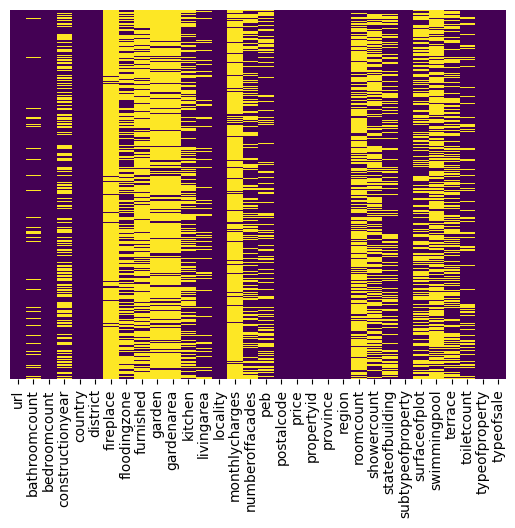

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

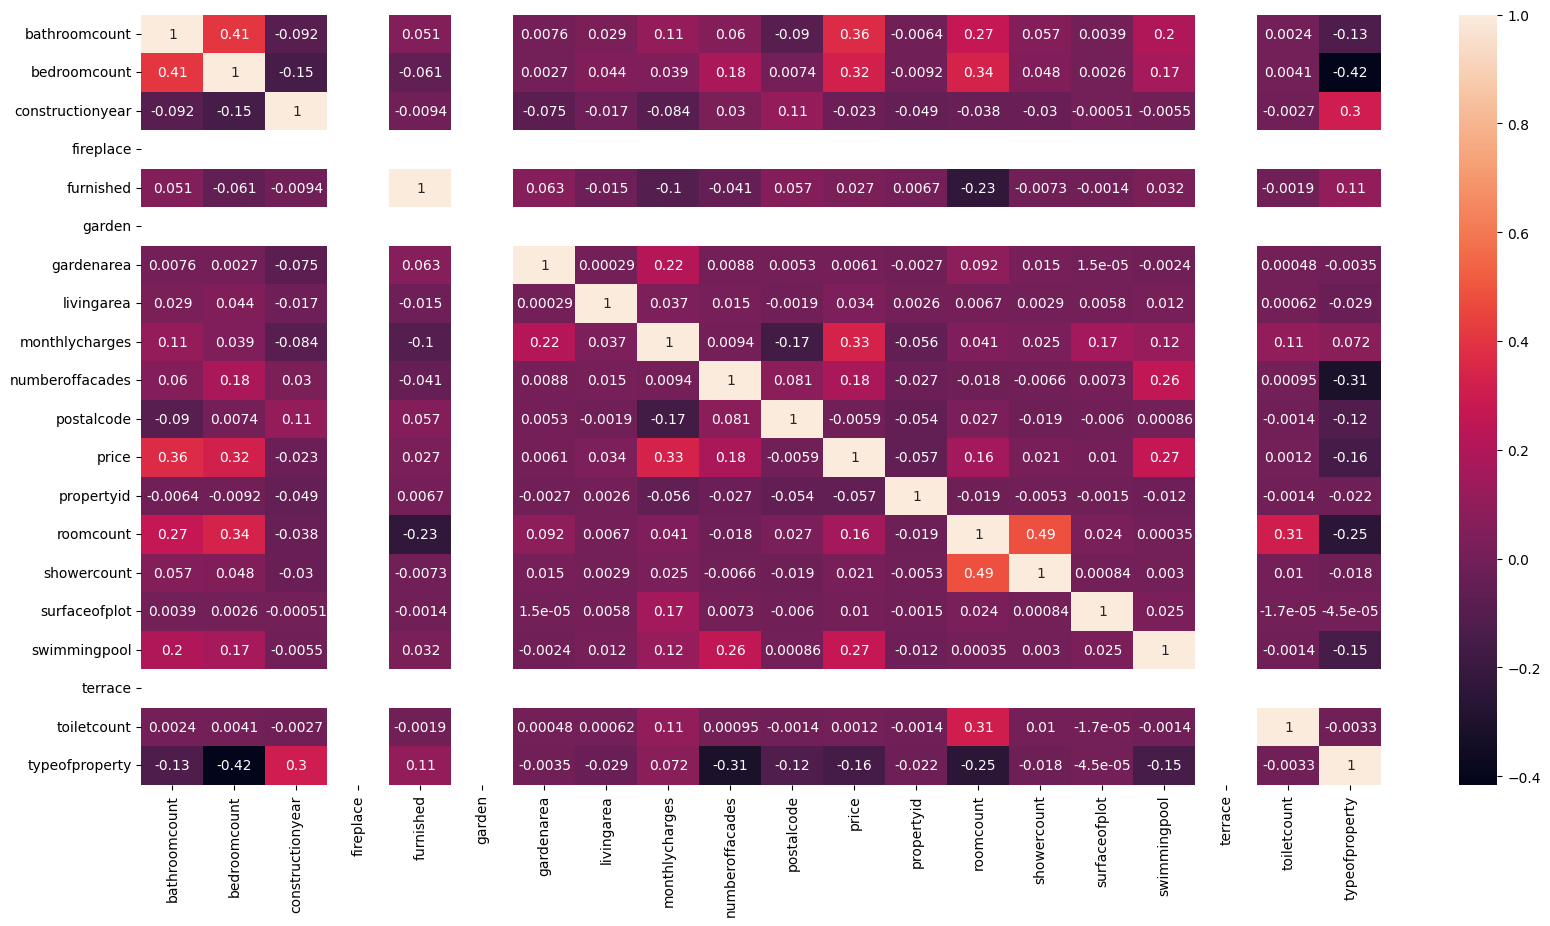

In [ ]:
num_col = df.select_dtypes(include = 'number').columns


corr_matrix = df[num_col].corr()

plt.figure(figsize = (20, 10))

sns.heatmap(corr_matrix, annot= True);

#### *Let's see the correlation of numerical features with the target value*

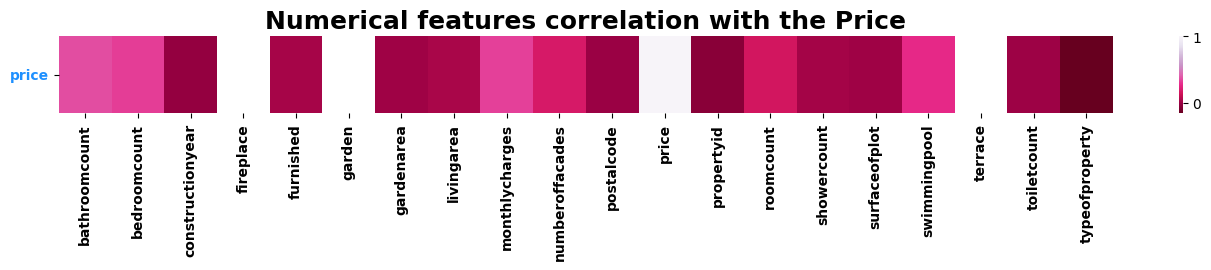

In [ ]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))


sns.heatmap(corr_num.sort_values(by = ['price'], ascending = False).head(1), cmap = 'PuRd_r');
plt.title("Numerical features correlation with the Price", weight = 'bold', fontsize = 18)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold', color = 'dodgerblue', rotation = 0)

plt.show()

In [ ]:
correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation


,price
price,1.00
bathroomcount,0.36
monthlycharges,0.33
bedroomcount,0.32
swimmingpool,0.27
numberoffacades,0.18
roomcount,0.16
livingarea,0.03
furnished,0.03
showercount,0.02


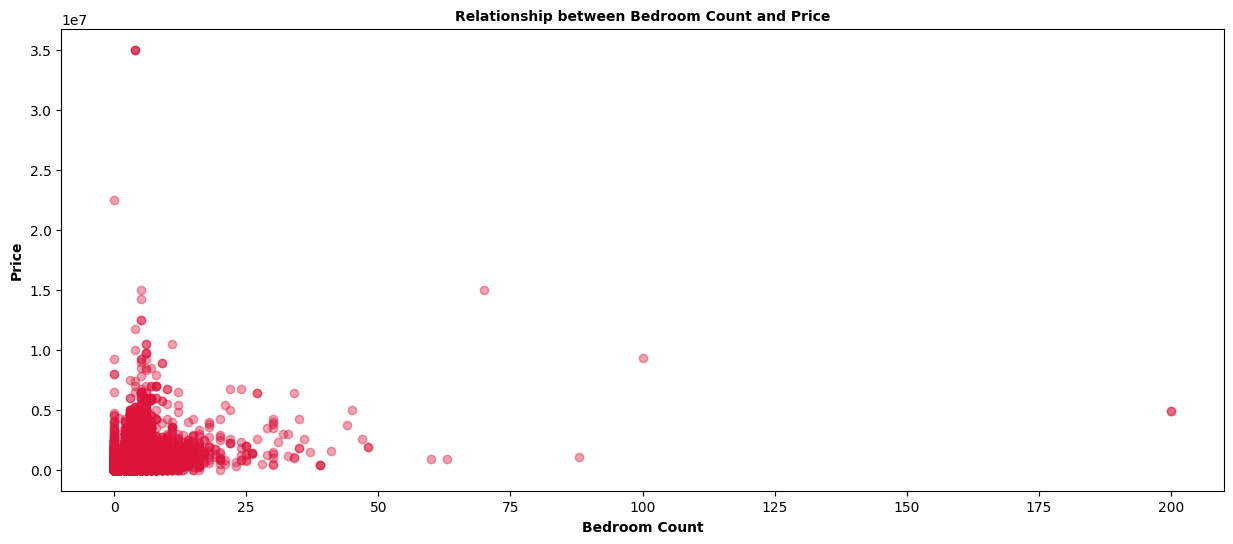

In [ ]:
plt.figure(figsize = (15, 6))
plt.scatter(data = df, x = 'bedroomcount', y = 'price', color = 'crimson', alpha = 0.4)
plt.title("Relationship between Bedroom Count and Price", weight = 'bold', fontsize = 10)
plt.xlabel("Bedroom Count", weight = 'bold')
plt.ylabel("Price", weight = 'bold')
plt.show()